# Assignment 3 — Association Rule Mining

**Dataset:** `bread_basket.csv` (11569 transactions)

Fill in the short answer cells and run the code cells. This notebook generates the required tables and figures.

**Sections:**
1. Setup & Data Load
2. EDA (a–e)
3. Frequent Itemset Mining (FP-Growth)
4. Association Rules + Report Table
5. Rule Subgraph (Bread, Coffee, Cake, Tea)
6. Interpretation Prompt


## 1) Setup & Data Load (10 pts)
- Place `bread_basket.csv` in the same folder as this notebook **or** update the path below.
- Needed packages: `pandas`, `matplotlib`, `mlxtend`, `networkx` (for the small graph).
- If a package is missing, run the `pip install` cell.

In [9]:
# write your answer here
%pip install pandas matplotlib mlxtend networkx
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
import warnings
warnings.filterwarnings('ignore')

from google.colab import files
uploaded = files.upload()

bread = pd.read_csv("bread_basket.csv")
print(f"Rows: {len(bread):,}")
print(f"Unique transactions: {bread['transaction'].nunique():,}")
print(f"Unique items: {bread['item'].nunique()}")
bread.head()

Saving bread_basket.csv to bread_basket (3).csv
Rows: 20,507
Unique transactions: 9,465
Unique items: 94


,transaction,item,date_time,time,period_day,weekday_weekend
0,1,Bread,30/10/2016,9:58,morning,weekend
1,2,Scandinavian,30/10/2016,10:05,morning,weekend
2,2,Scandinavian,30/10/2016,10:05,morning,weekend
3,3,Hot chocolate,30/10/2016,10:07,morning,weekend
4,3,Jam,30/10/2016,10:07,morning,weekend


## 2) EDA (a–e) (30 pts)
### a) List variables and their dtypes (5 pts)

In [7]:
# write your answer here
print(bread.dtypes)

transaction         int64
item               object
date_time          object
time               object
period_day         object
weekday_weekend    object
dtype: object


### b) "Statistics" overview (5 pts)
Use `describe(include='all')` as a stand‑in for RapidMiner's Statistics. Take a screenshot when you submit.

In [8]:
# write your answer here
bread.describe(include='all')

,transaction,item,date_time,time,period_day,weekday_weekend
count,20507.000000,20507,20507,20507,20507,20507
unique,NaN,94,159,1255,4,2
top,NaN,Coffee,2017-02-04,11:06,afternoon,weekday
freq,NaN,5471,292,52,11569,12807
mean,4976.202370,NaN,NaN,NaN,NaN,NaN
std,2796.203001,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,2552.000000,NaN,NaN,NaN,NaN,NaN
50%,5137.000000,NaN,NaN,NaN,NaN,NaN
75%,7357.000000,NaN,NaN,NaN,NaN,NaN


### c) Bar plot — count of **unique transactions per item** (10 pts)
Set the subtitle to your **FirstName LastName**. Take a screenshot of the figure.

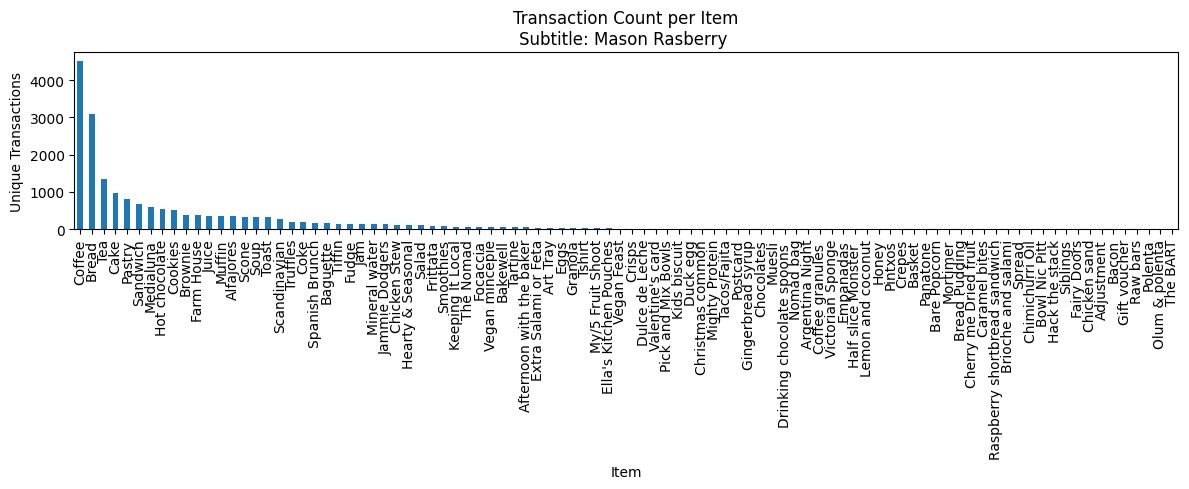

In [11]:
# c) Bar plot of transaction counts per item
subtitle = "Mason Rasberry "  # <-- EDIT THIS
item_counts = bread.groupby('item')['transaction'].nunique().sort_values(ascending=False) # <-- EDIT THIS

ax = item_counts.plot(kind='bar', figsize=(12,5))
plt.title(f"Transaction Count per Item\nSubtitle: {subtitle}")
plt.xlabel("Item"); plt.ylabel("Unique Transactions")
plt.tight_layout()
plt.show()

### d) Report counts for Coffee, Tea, Alfajores, Juice, and Chicken Stew (10 pts)

In [12]:
# write your answer here
target_items = ['Coffee', 'Tea', 'Alfajores', 'Juice', 'Chicken Stew']
for item in target_items:
    count = bread[bread['item'] == item]['transaction'].nunique()
    print(f"{item}: {count} transactions")

Coffee: 4528 transactions
Tea: 1350 transactions
Alfajores: 344 transactions
Juice: 365 transactions
Chicken Stew: 123 transactions


## 3) Frequent Itemset Mining with FP‑Growth (min_support = 0.2) (20 pts)
We pivot the data to a **transaction × item** one‑hot table (boolean), then run FP‑Growth.

In [14]:
# write your answer here
# Group the data so each transaction becomes a list of items purchased
basket = bread.groupby('transaction')['item'].apply(list).tolist()

# Convert the list of transactions into a True/False matrix
# each row is a transaction, each column is an item
te = TransactionEncoder()
te_array = te.fit_transform(basket)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# Run FP-Growth with a minimum support of 2% meaning an itemset must appear in at least 2% of all transactions to be considered frequent
frequent_itemsets = fpgrowth(df_encoded, min_support=0.02, use_colnames=True)

# Add a column to show how many items are in each itemset
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(len)

# Display the results sorted by support
print(f"Total frequent itemsets found: {len(frequent_itemsets)}")
frequent_itemsets.sort_values('support', ascending=False)

Total frequent itemsets found: 33


,support,itemsets,length
5,0.478394,(Coffee),1
0,0.327205,(Bread),1
8,0.142631,(Tea),1
12,0.103856,(Cake),1
19,0.090016,"(Coffee, Bread)",2
6,0.086107,(Pastry),1
13,0.071844,(Sandwich),1
7,0.061807,(Medialuna),1
2,0.058320,(Hot chocolate),1
28,0.054728,"(Coffee, Cake)",2


## 4) Association Rules + Report Table (30 pts)
(metric = confidence, min_threshold = ?) Please find a suitable min_threshold

In [15]:
# write your answer here
# Generate association rules from the frequent itemsets using confidence as the metric with a minimum threshold of 20%
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.20)

# Sort the rules by lift so the most interesting relationships appear first, lift > 1 means the items are positively associated with each other
rules = rules.sort_values('lift', ascending=False)

# Display the most relevant columns
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
9,(Cake),(Tea),0.023772,0.228891,1.604781
12,(Toast),(Coffee),0.023666,0.704403,1.472431
5,(Medialuna),(Coffee),0.035182,0.569231,1.189878
3,(Pastry),(Coffee),0.047544,0.552147,1.154168
7,(Juice),(Coffee),0.020602,0.534247,1.116750
11,(Sandwich),(Coffee),0.038246,0.532353,1.112792
8,(Cake),(Coffee),0.054728,0.526958,1.101515
2,(Cookies),(Coffee),0.028209,0.518447,1.083723
1,(Hot chocolate),(Coffee),0.029583,0.507246,1.060311
4,(Pastry),(Bread),0.029160,0.338650,1.034977


## 5) Interpretation (10 pts)
**Interpret the rule `{Coffee, Cake} ⇒ {Bread}` in plain English.**

- **Support**: What fraction of *all* transactions contain Coffee, Cake, and Bread together?
- **Confidence**: Among baskets with Coffee and Cake, what share also include Bread?
- **Lift > 1** implies positive association; comment on practical meaning.

*Your notes:* (write your answer here)

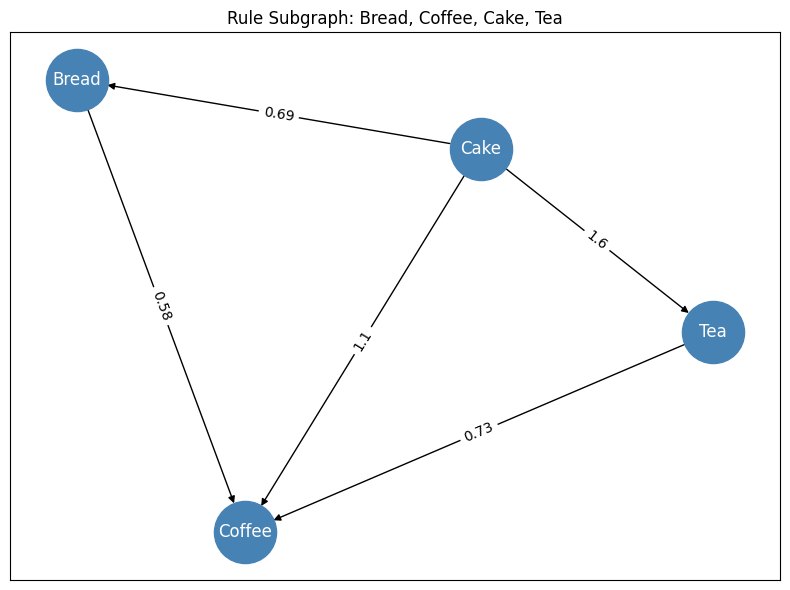

In [16]:
#Rule Subgraph
# Filter rules to only include Bread, Coffee, Cake, and Tea
focus_items = {'Bread', 'Coffee', 'Cake', 'Tea'}

# Keep only rules where both sides contain items from our focus group
focus_rules = rules[
    rules['antecedents'].apply(lambda x: x.issubset(focus_items)) &
    rules['consequents'].apply(lambda x: x.issubset(focus_items))
]

# Create a directed graph where each rule becomes an arrow between items
G = nx.DiGraph()
for _, row in focus_rules.iterrows():
    ant = ', '.join(list(row['antecedents']))
    con = ', '.join(list(row['consequents']))
    # each edge is labeled with the lift value of that rule
    G.add_edge(ant, con, weight=round(row['lift'], 2))

# Draw the graph, nodes are the items and arrows show the direction of each rule
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos, node_color='steelblue', node_size=2000, font_color='white', arrows=True)

# Add lift values as labels on each arrow
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Rule Subgraph: Bread, Coffee, Cake, Tea")
plt.tight_layout()
plt.show()

Support of 0.010 means only 1% of all transactions contain coffee, cake, and bread together, so this is a rare combination. Confidence of 0.183 means that only 18.3% of customers who bought coffee and cake also added bread. Lift of 0.56 is below 1, indicating a negative
association, meaning that customers who already have coffee and cake are less likely to buy bread. This is probably because cake already serves as the baked good to accompany coffee, making bread feel redundant. This rule should not be used for bundling or promotions.

>